# Business Statement

* The goal is to analyze employee attrition (turnover) and identify key factors affecting it.

## Attrition refers to employees leaving a company, either voluntarily or involuntarily. High attrition can lead to:

* Increased hiring costs

* Loss of company knowledge

* Disruptions in productivity

## We aim to answer:

* What are the main factors affecting employee attrition?

* How does salary, job satisfaction, work-life balance, and job role impact attrition?

* Can we predict if an employee is likely to leave?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Basic Checks

In [4]:
# Display the first few rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
# Diplay last few rows
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
# Check column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Checking shape
df.shape

(1470, 35)

In [8]:
# Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Summary statistics for numerical columns
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Exploratory Data Analysis

## Target Variable Analysis

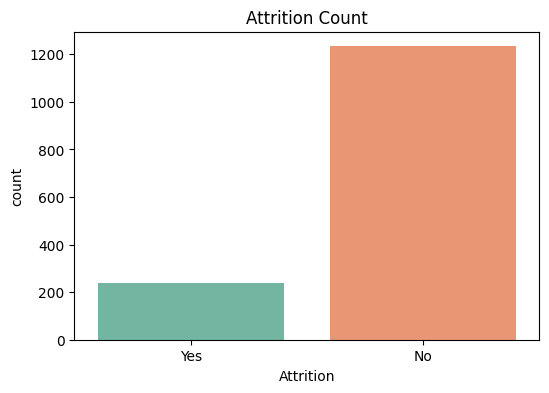

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [4]:
# Check distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Attrition Count")
plt.show()

# Percentage distribution
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print(attrition_rate)

* We may observe an imbalanced dataset, where "No" cases dominate.


* If needed, we can handle it using SMOTE or class weighting in modeling.

## Univarite Analysis

### Numerical Features

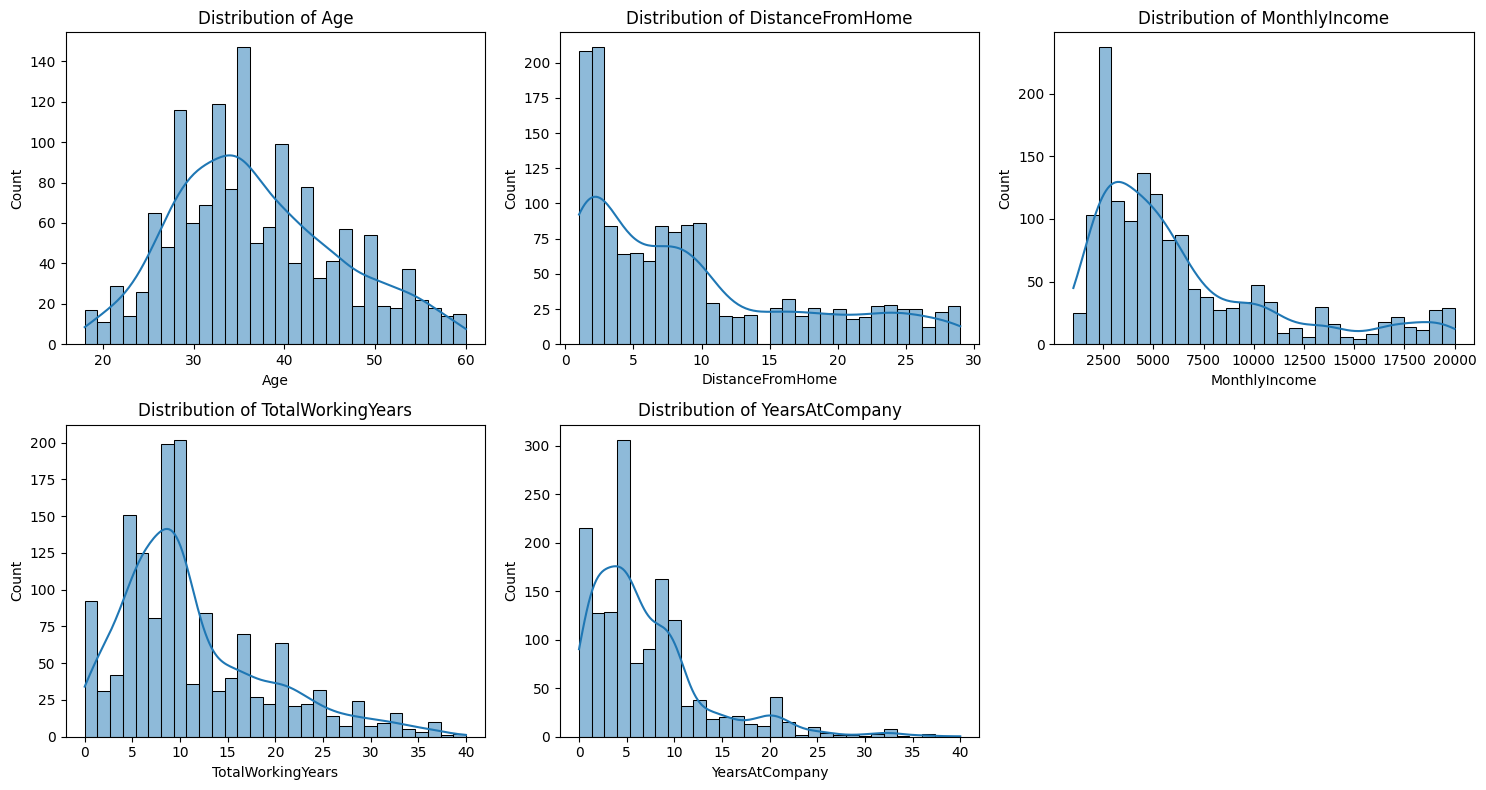

In [5]:
# Plot distributions of key numerical features
num_features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

* MonthlyIncome , YearsAtCompany and TotalWorkingYears is right-skewed (outliers present).


* DistanceFromHome distribution can indicate whether long commutes affect attrition.

## Categorical Features

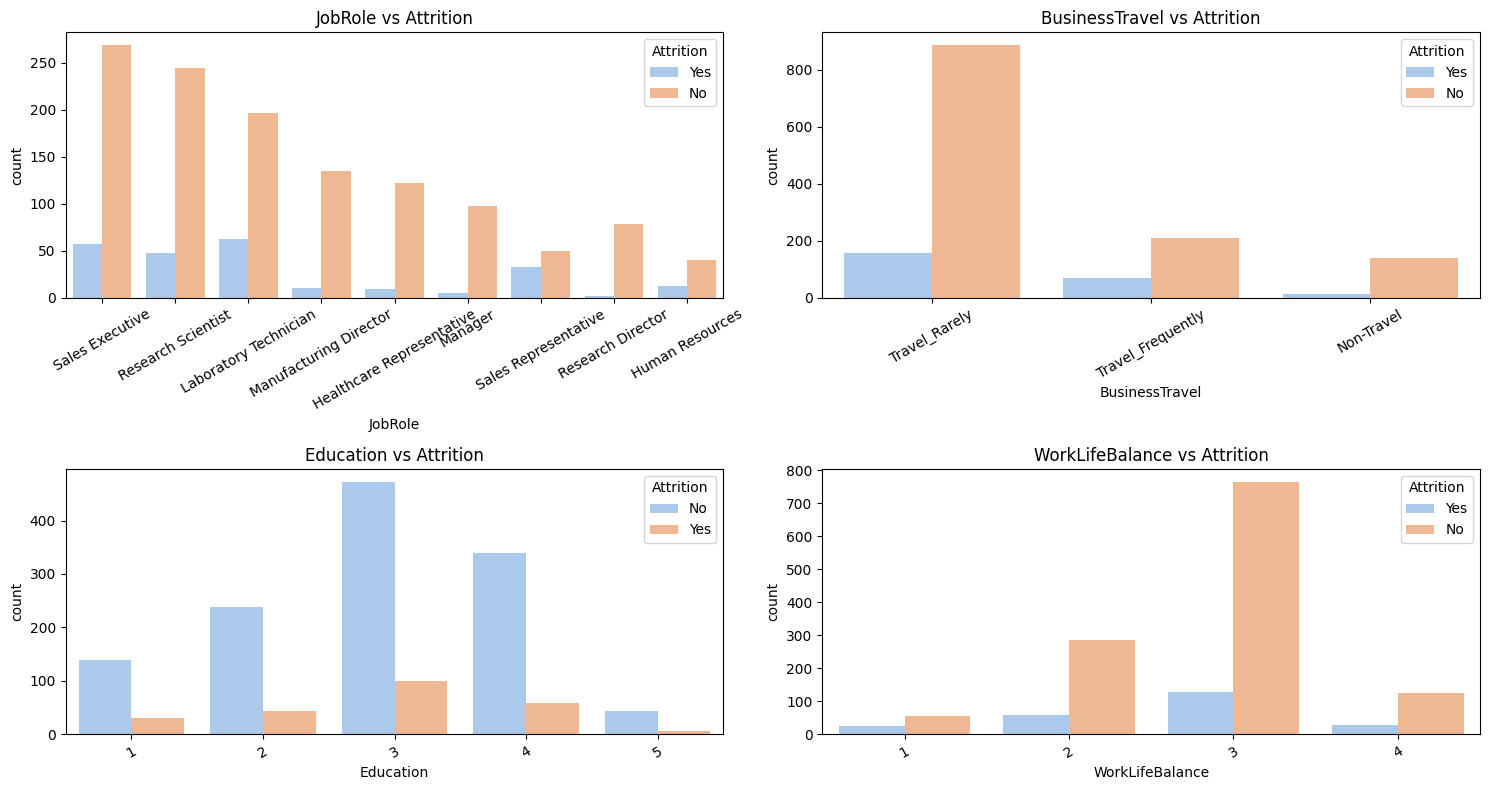

In [6]:
# Plot categorical features
cat_features = ["JobRole", "BusinessTravel", "Education", "WorkLifeBalance"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue="Attrition", palette="pastel")
    plt.xticks(rotation=30)
    plt.title(f"{col} vs Attrition")
plt.tight_layout()
plt.show()

* Employees in certain Job Roles may have higher attrition.


* BusinessTravel may show that frequent travel increases attrition.


* Work-life balance can have an impact on employee retention.


## Bivariate Analysis

### Numeric Features vs. Attrition

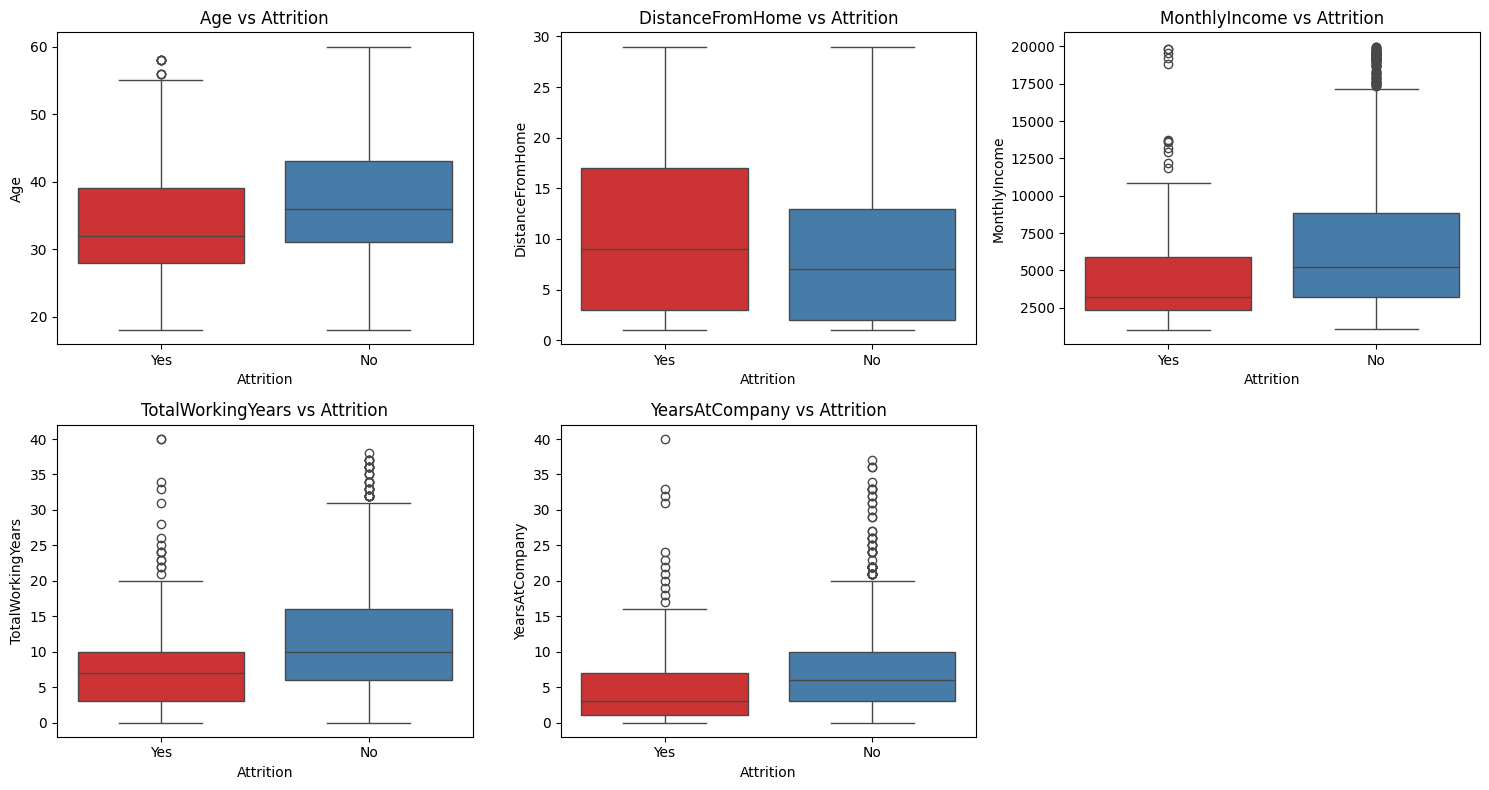

In [7]:
plt.figure(figsize=(15, 8))

# List of numerical features to analyze against attrition
num_features_attrition = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]

for i, col in enumerate(num_features_attrition, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x="Attrition", y=col, palette="Set1")
    plt.title(f"{col} vs Attrition")
plt.tight_layout()
plt.show()

* Age: Younger employees may have a higher attrition rate, while older employees tend to stay longer.
    

* DistanceFromHome: Employees with longer commutes may have higher attrition rates.
    

* MonthlyIncome: Lower-income employees may have a higher attrition rate.

    
* TotalWorkingYears: Employees with fewer total years of experience might leave more often.

    
* YearsAtCompany: Employees who have been at the company for fewer years tend to leave more frequently.

### Categorical vs. Categorical (Attrition)

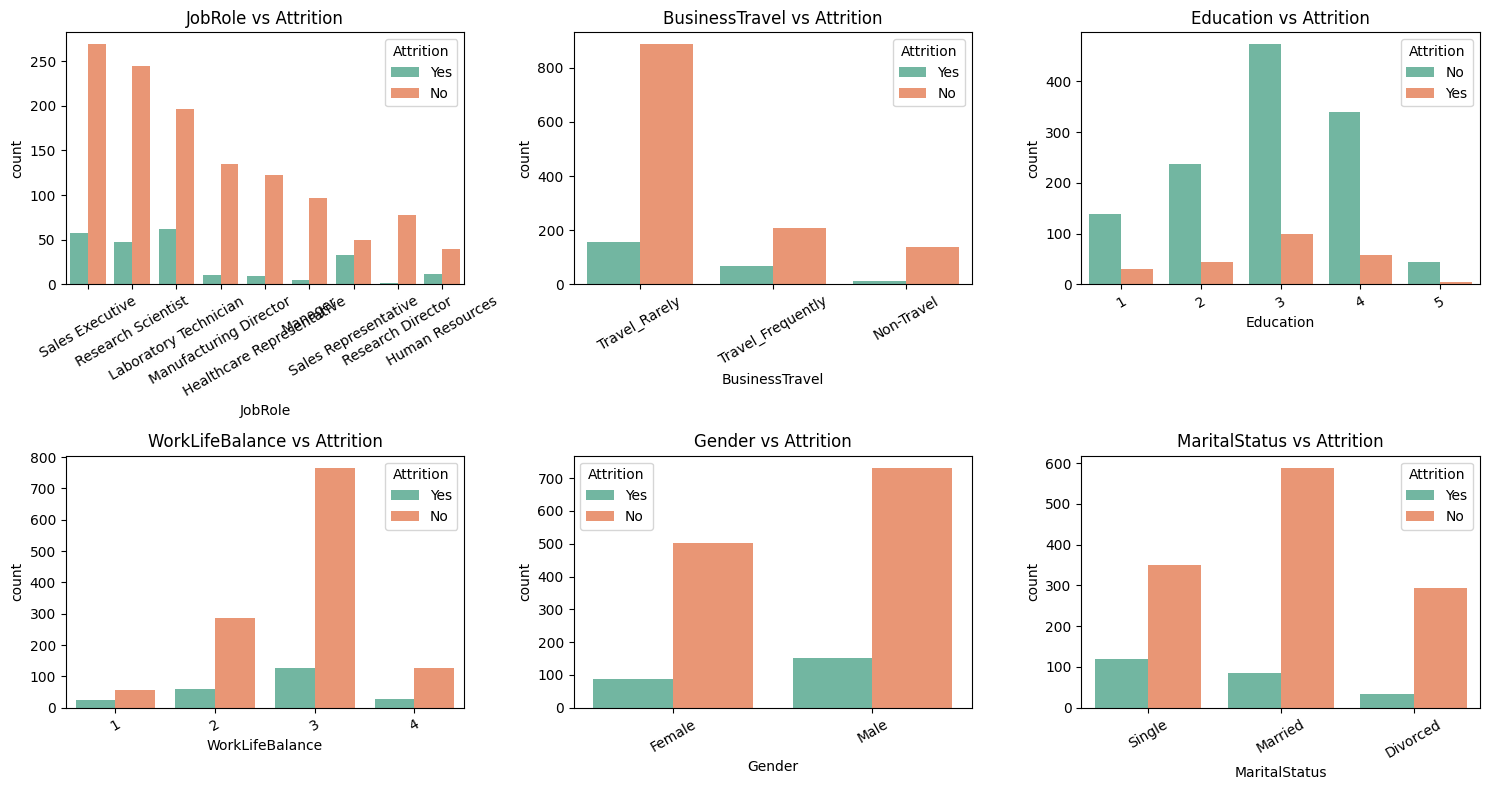

In [8]:
plt.figure(figsize=(15, 8))

# Plot categorical features against Attrition
cat_features_attrition = ["JobRole", "BusinessTravel", "Education", "WorkLifeBalance", "Gender", "MaritalStatus"]

for i, col in enumerate(cat_features_attrition, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue="Attrition", palette="Set2")
    plt.title(f"{col} vs Attrition")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

* JobRole: Certain job roles (e.g., Sales Executive, Research Scientist) might have a higher attrition rate.


* BusinessTravel: Employees who travel frequently might leave the company more often due to work-life balance.

    
* Education: Employees with higher education levels may stay longer or move into better roles.

    
* WorkLifeBalance: Poor work-life balance correlates with higher attrition.

    
* Gender and Marital Status: There may be no significant difference in attrition across gender, but marital status can affect retention.


## Multivariate Analysis

### Pairplot

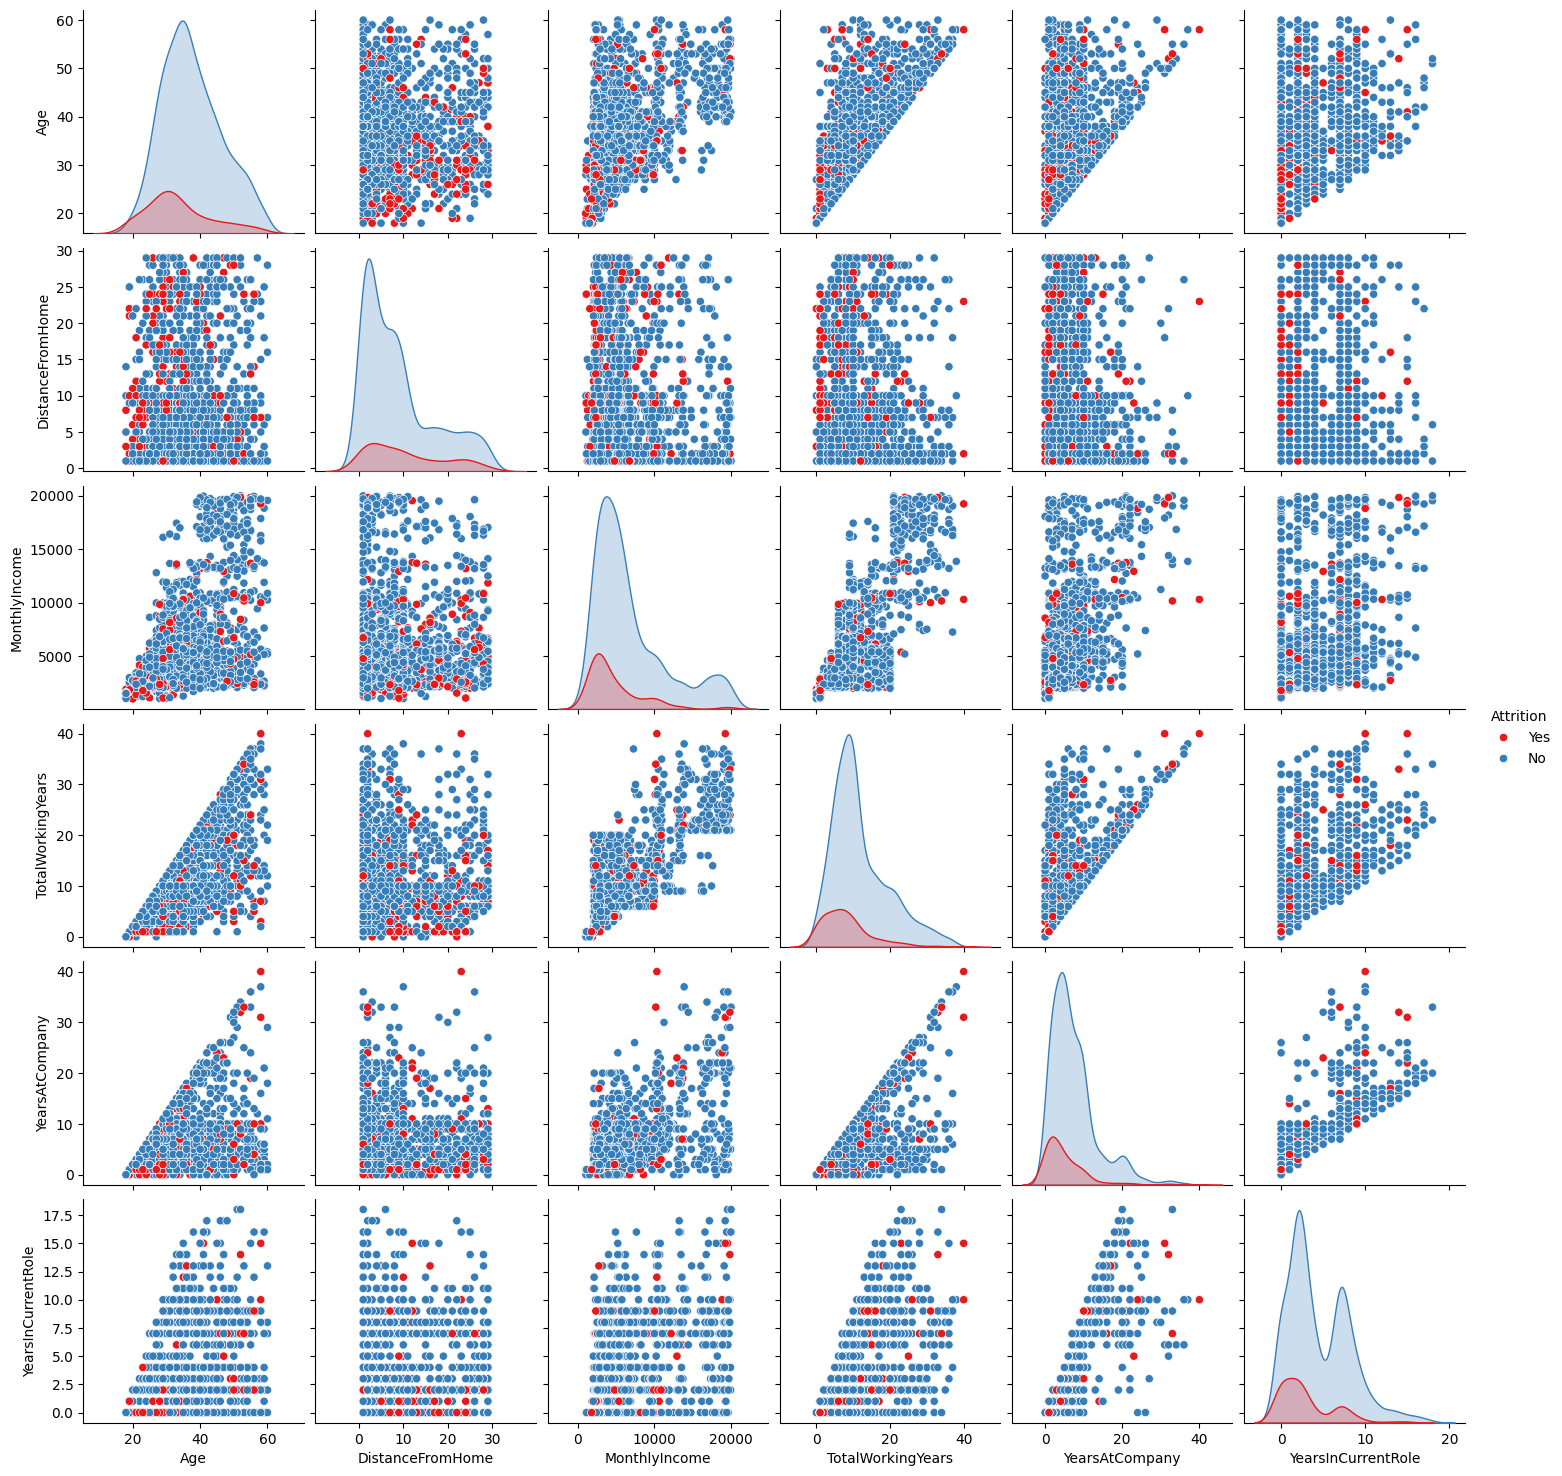

In [20]:
# Select numerical features for the pairplot
num_features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole"]

# Pairplot to see the relationships between the features
sns.pairplot(df[num_features + ['Attrition']], hue="Attrition", diag_kind="kde", palette="Set1")
plt.show()

* We can visualize how numerical features like Age, MonthlyIncome, and YearsAtCompany differ between employees who stayed vs. those who left.


* For instance, younger employees (Age) or those with fewer years at the company (YearsAtCompany) may show a higher concentration in the Attrition = Yes category.


* The MonthlyIncome feature might be useful in distinguishing between employees who stay and those who leave.

### Heatmap

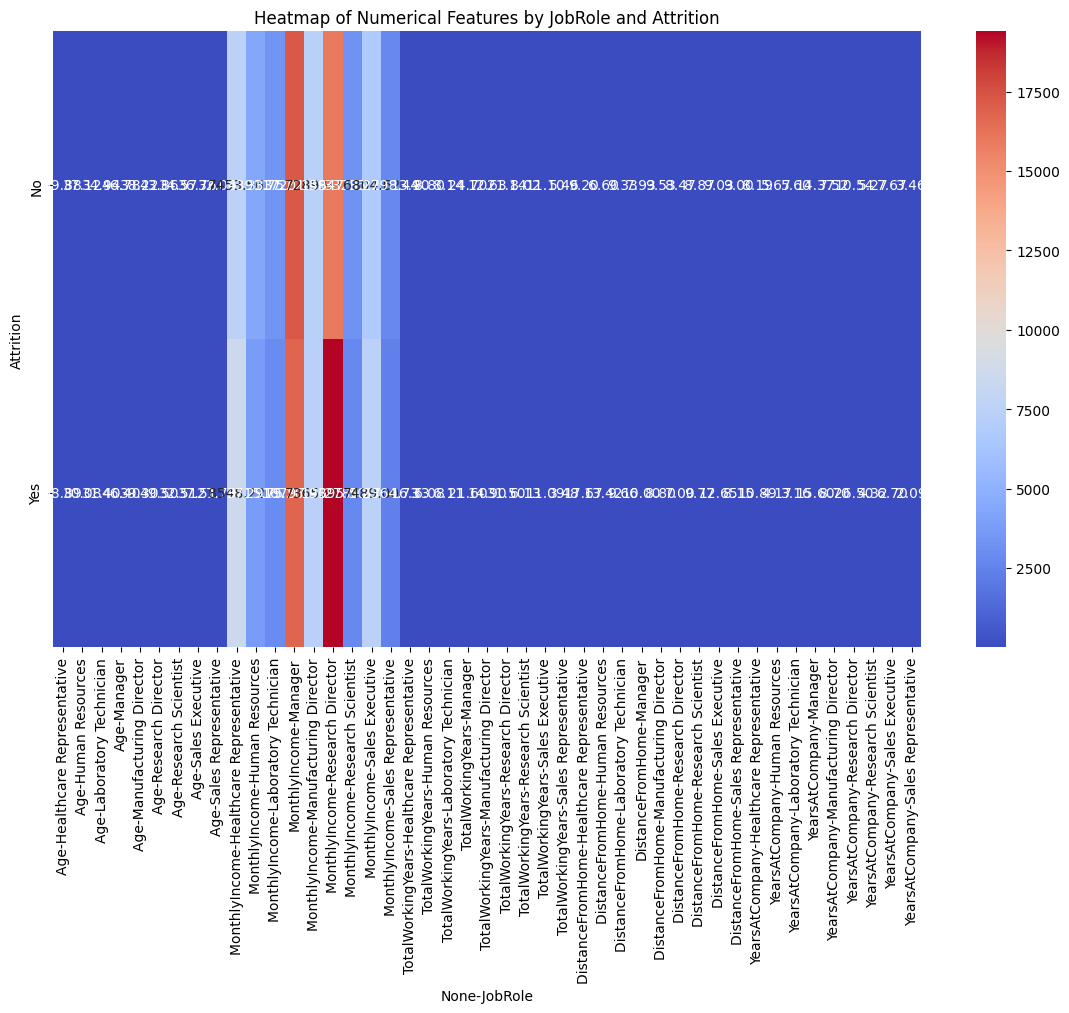

In [22]:
# Heatmap to visualize the mean values of numerical features for each categorical feature and Attrition
heatmap_data = df.groupby(['Attrition', 'JobRole'])[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome', 'YearsAtCompany']].mean().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Features by JobRole and Attrition")
plt.show()

* We can spot differences in numerical values, like MonthlyIncome or YearsAtCompany, between various job roles and attrition status.


* For instance, Research Scientists or Sales Executives may show a different pattern in income or tenure compared to Managers or Technicians, correlating with their attrition rate.

### 3D Scatter Plot (Numerical Features with Attrition)

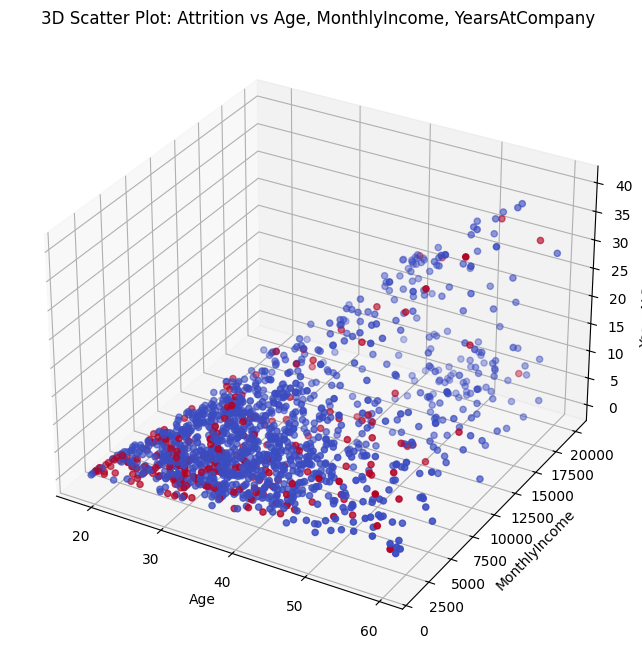

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot with three numerical features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting 'Age', 'MonthlyIncome', 'YearsAtCompany' vs 'Attrition'
ax.scatter(df['Age'], df['MonthlyIncome'], df['YearsAtCompany'], c=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0), cmap='coolwarm')
ax.set_xlabel('Age')
ax.set_ylabel('MonthlyIncome')
ax.set_zlabel('YearsAtCompany')

plt.title('3D Scatter Plot: Attrition vs Age, MonthlyIncome, YearsAtCompany')
plt.show()

* We can observe if certain numerical features (e.g., Age, MonthlyIncome, YearsAtCompany) can be used to predict Attrition.


* There might be clusters where younger employees with fewer years at the company or lower income are more likely to attrite.


### Violin Plot (Categorical vs. Numerical)

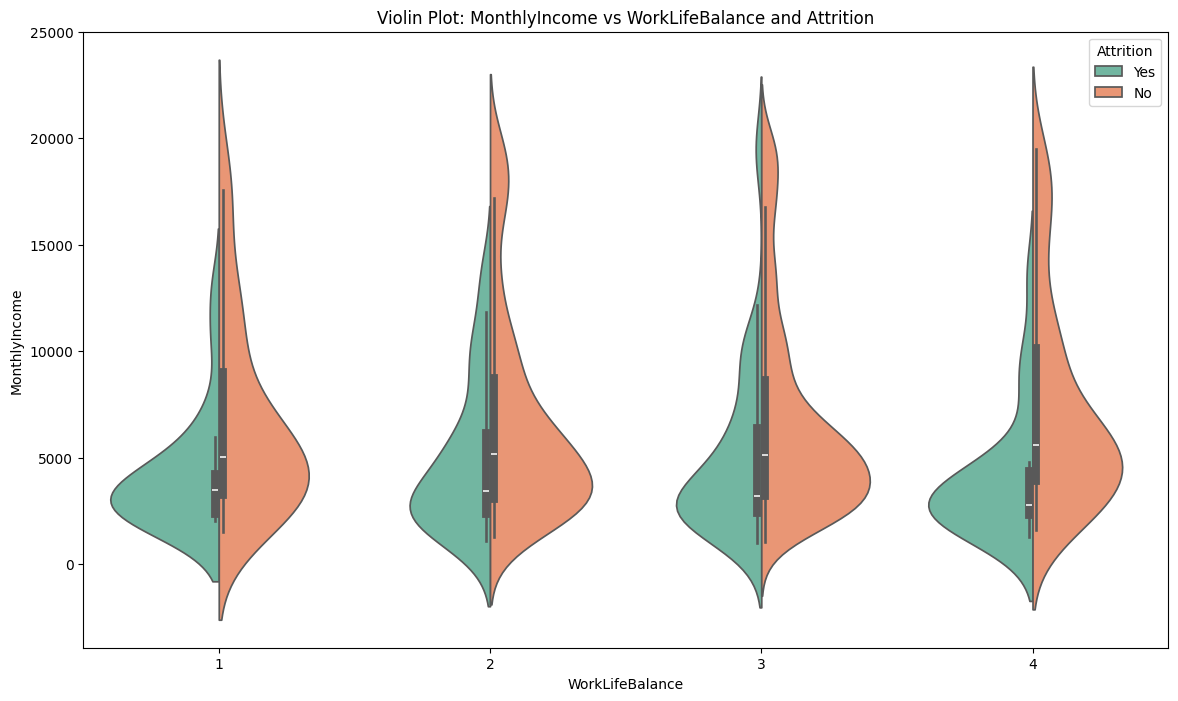

In [27]:
# Violin plot for 'MonthlyIncome' vs 'WorkLifeBalance' and 'Attrition'
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x="WorkLifeBalance", y="MonthlyIncome", hue="Attrition", split=True, palette="Set2")
plt.title("Violin Plot: MonthlyIncome vs WorkLifeBalance and Attrition")
plt.show()

* Employees with a "Bad" work-life balance might have more extreme values for MonthlyIncome, with lower-paid employees tending to leave.


* The split option helps us directly compare distributions of MonthlyIncome for employees who stayed vs. those who left.

### Interaction Between Multiple Features

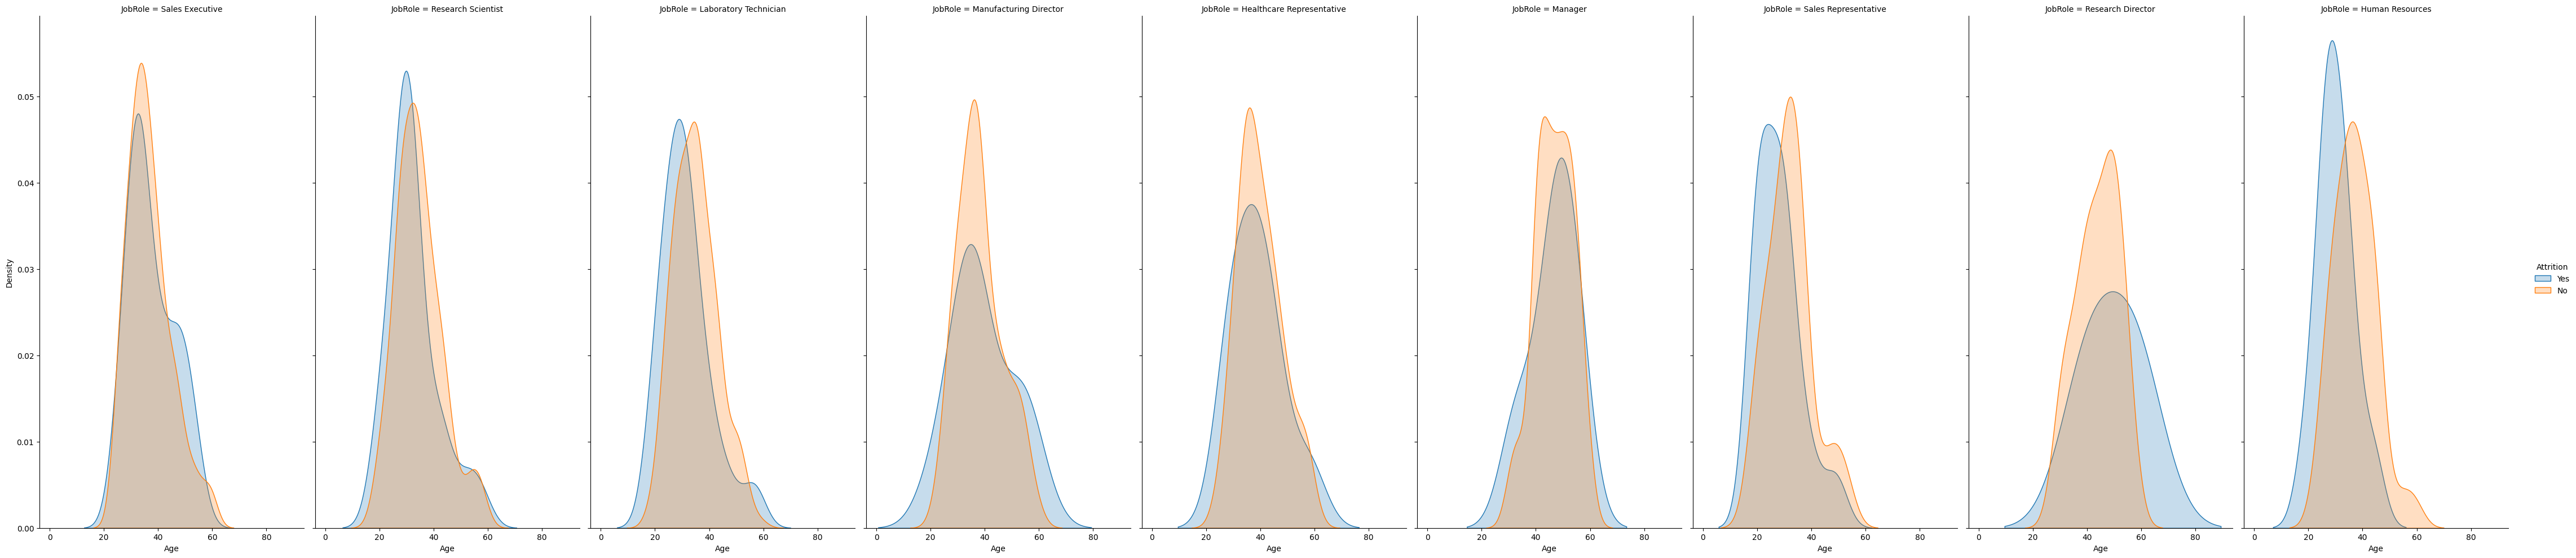

In [31]:
# FacetGrid: Explore the interaction between 'JobRole', 'Age', and 'Attrition'
g = sns.FacetGrid(df, col="JobRole", hue="Attrition", height=10, aspect=0.5)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
plt.show()

* This will show how Age and Attrition vary across different JobRoles.


* Employees in roles like Sales Executive or Research Scientist might have different age distributions than those in higher management roles, indicating varying attrition trends.

### Multivariate Analysis with Feature Interactions (Pairwise Interaction between Features)

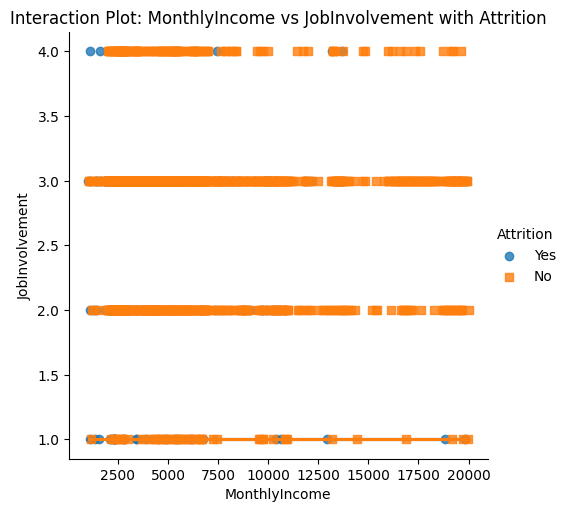

In [32]:
# Plotting interactions between 'MonthlyIncome', 'JobInvolvement', and 'Attrition'
sns.lmplot(data=df, x="MonthlyIncome", y="JobInvolvement", hue="Attrition", logistic=True, markers=["o", "s"])
plt.title("Interaction Plot: MonthlyIncome vs JobInvolvement with Attrition")
plt.show()

* We can identify how JobInvolvement interacts with MonthlyIncome in determining Attrition.


* Higher JobInvolvement at lower incomes could indicate higher attrition, especially for employees with fewer years in the company.

# Data preprocessing

## Handling missing values

In [9]:
# Checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Handling Outliers

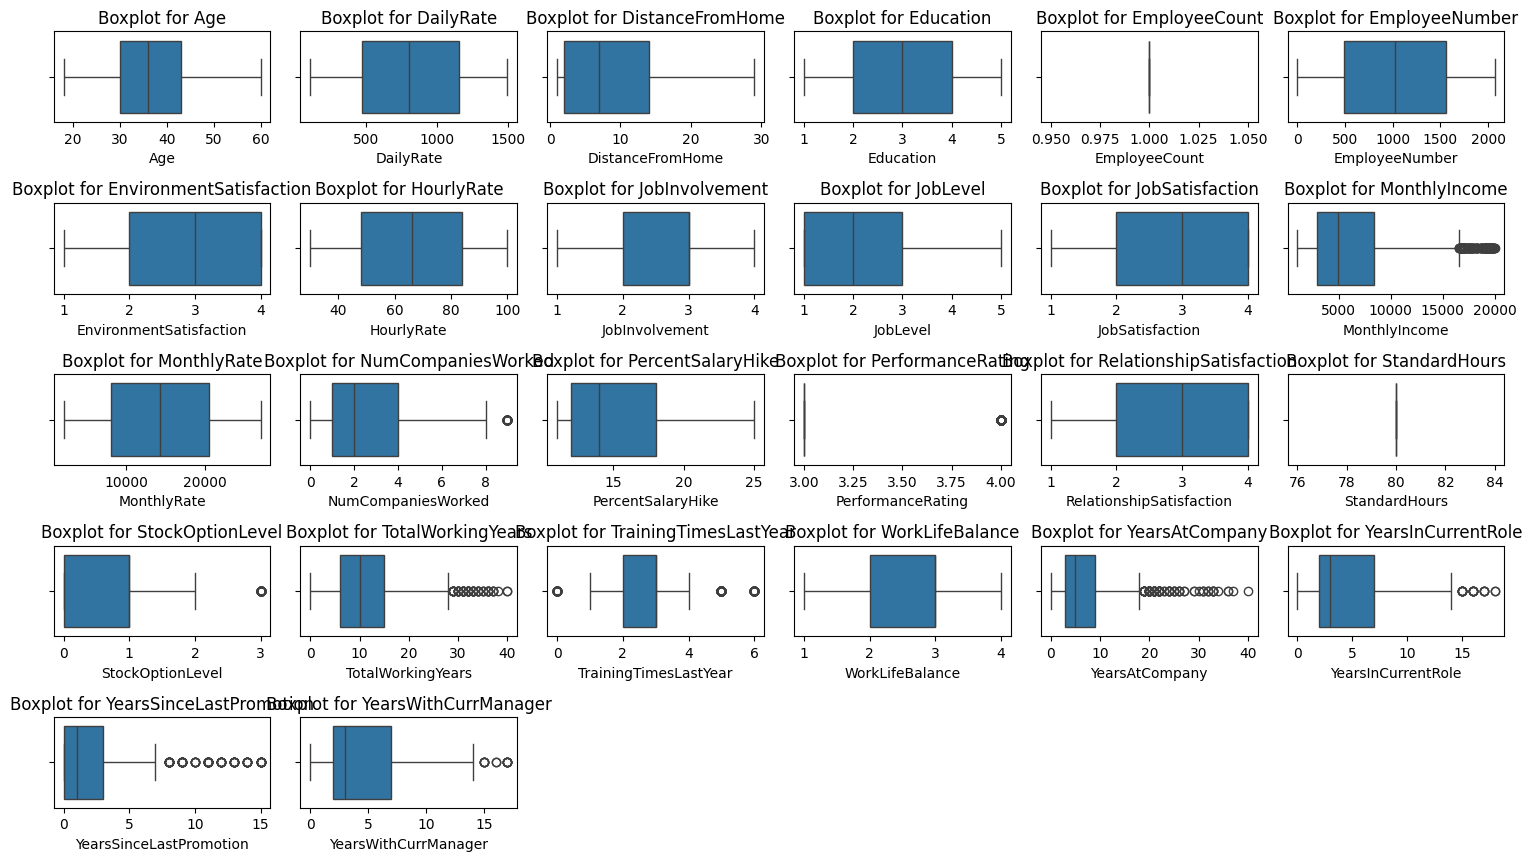

In [10]:
# Loop through all numerical columns and plot box plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)  # Adjust the grid size based on number of columns
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [11]:
# Function to detect and handle outliers using IQR (Interquartile Range)
def handle_outliers_iqr(df, numerical_cols):
    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip outliers to the bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Apply the function to handle outliers for all numerical columns
handle_outliers_iqr(df, numerical_cols)

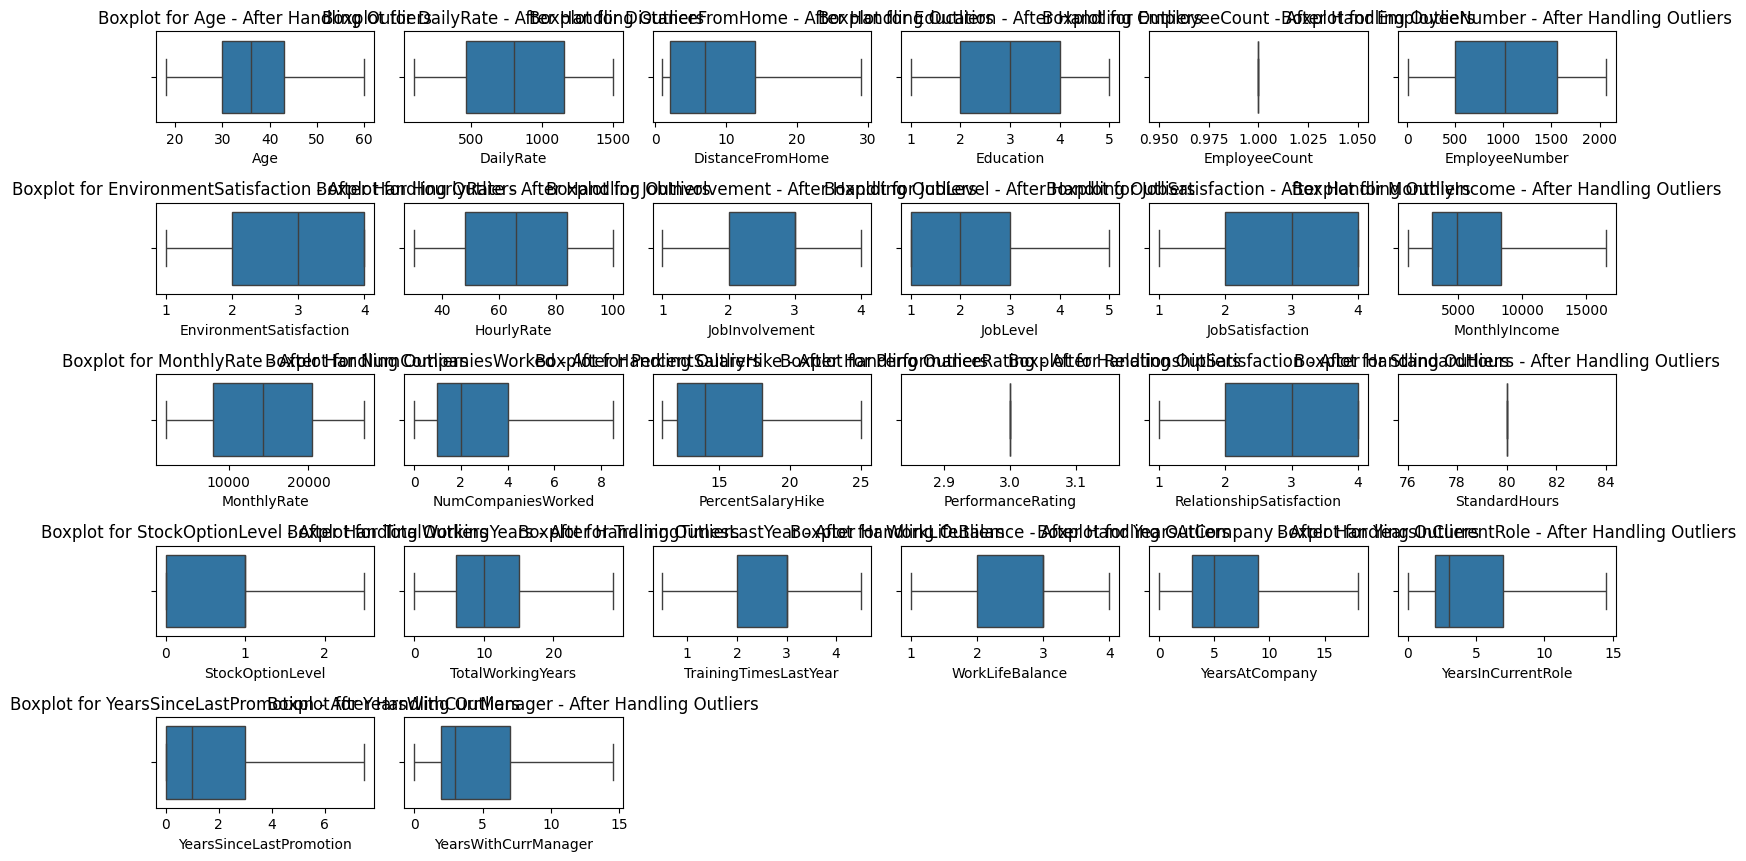

In [12]:
# Plot box plots after handling outliers to check if the clipping worked
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)  # Adjust the grid size based on number of columns
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col} - After Handling Outliers")
plt.tight_layout()
plt.show()

## Categorical to Numerical

In [13]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns in the dataframe
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding on each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the first few rows of the transformed dataframe
print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80               0

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling on numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the first few rows of the scaled dataframe
print(df.head())

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.446350          1               2   0.742527           2   
1  1.322365          0               1  -1.297775           1   
2  0.008343          1               2   1.414363           1   
3 -0.429664          0               1   1.461466           1   
4 -1.086676          0               2  -0.524295           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  \
0         -1.010909  -0.891688               1            0.0       -1.701283   
1         -0.147150  -1.868426               1            0.0       -1.699621   
2         -0.887515  -0.891688               4            0.0       -1.696298   
3         -0.764121   1.061787               1            0.0       -1.694636   
4         -0.887515  -1.868426               3            0.0       -1.691313   

   ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  ...                 -1.584178            0.0      

# Feature Engineering

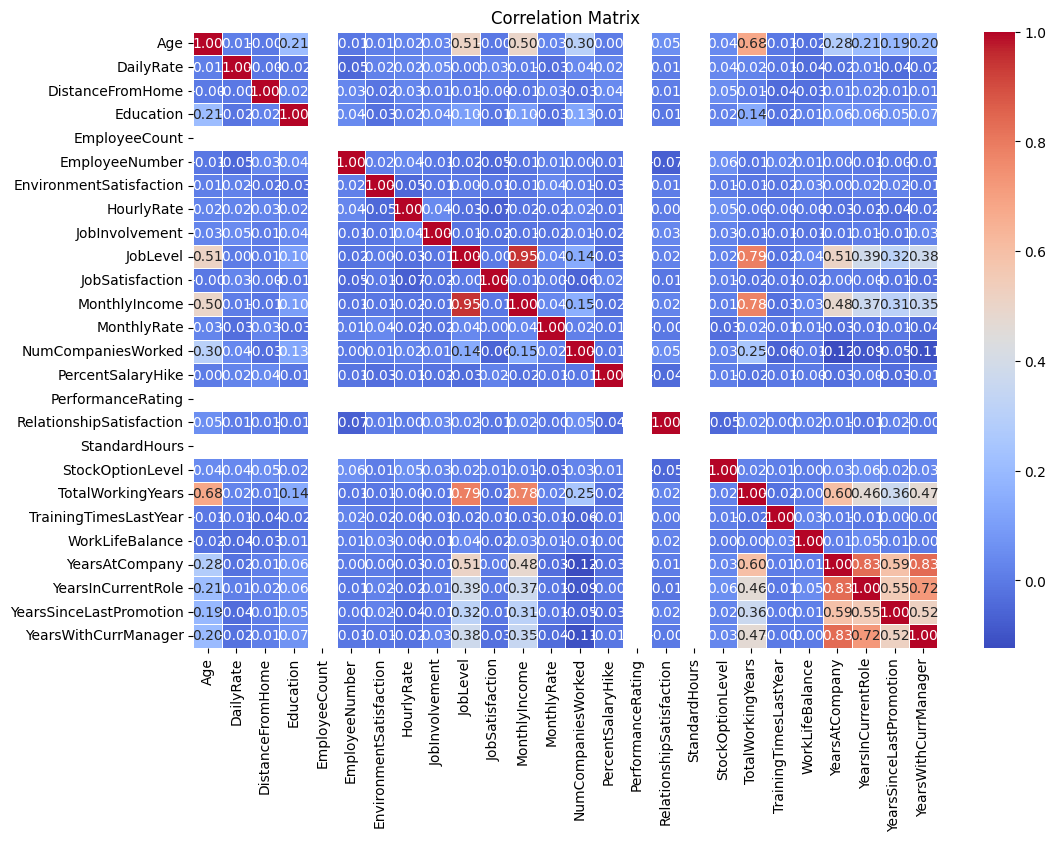

In [15]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [16]:
# Find pairs of highly correlated features
correlation_matrix = df[numerical_cols].corr()
high_correlation_pairs = []

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > 0.8 and row != col:
            high_correlation_pairs.append((row, col))

# Print pairs with high correlation
print("Highly correlated feature pairs:")
for pair in high_correlation_pairs:
    print(pair)

# Drop one of the highly correlated features (based on analysis)
df = df.drop(columns=['TotalWorkingYears'])  

Highly correlated feature pairs:
('MonthlyIncome', 'JobLevel')
('JobLevel', 'MonthlyIncome')
('YearsInCurrentRole', 'YearsAtCompany')
('YearsWithCurrManager', 'YearsAtCompany')
('YearsAtCompany', 'YearsInCurrentRole')
('YearsAtCompany', 'YearsWithCurrManager')


In [17]:
# Dropping the correlated features based on the analysis above
df = df.drop(columns=['JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager'])

# Verify the final dataframe columns
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')


EmployeeCount:

Reason: This column typically has a constant value (1 for all employees in most datasets). It does not contribute useful information to the model and should be dropped.

Action: Drop EmployeeCount.

EmployeeNumber:

Reason: Employee number is usually just an identifier for the employee and does not have any predictive power for attrition. It's likely just a unique value and can safely be dropped.

Action: Drop EmployeeNumber.

Over18:

Reason: This feature usually has the same value for all rows (e.g., 'Y' for everyone over 18). It is not likely to be predictive of attrition.

Action: Drop Over18.

StandardHours:

Reason: Like EmployeeCount, this column may also have a constant value (e.g., the standard working hours for all employees). If it does not vary, it will not provide any useful insights for the model.

Action: Drop StandardHours.

2. Features related to employee satisfaction and involvement:
JobInvolvement, JobSatisfaction, RelationshipSatisfaction, EnvironmentSatisfaction, WorkLifeBalance:

Reason: These are important features, but if there's any significant correlation with the target variable (Attrition), it might help to explore whether they contribute significantly or are redundant with other features. For now, you might consider keeping them for further analysis during feature importance checks or model tuning.

Action: Keep for now but monitor for redundancy or overlap.

3. Categorical Features (JobRole, BusinessTravel, etc.):
Reason: These columns can add value in a model, especially if there's a significant relationship with attrition. However, they need to be properly encoded (as you've already done label encoding for some).

Action: Keep for now, but ensure proper encoding (LabelEncoder is fine for ordinals and One-Hot Encoding for non-ordinal categorical variables).

4. Highly Correlated Features:
You’ve already dropped some features based on correlation (e.g., JobLevel, YearsInCurrentRole, YearsWithCurrManager). Double-check if any other features are strongly correlated after the previous drops. Use a heatmap or pairplot to visually confirm.

Action: Drop additional columns based on correlation if necessary.

Final Recommended Columns to Drop:
EmployeeCount

EmployeeNumber

Over18

StandardHours

In [18]:
# Dropping the unnecessary columns
df_final = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Verify the final dataset columns
print(df_final.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')


In [19]:
# If you decide to drop `MonthlyRate`
df_final = df.drop(columns=['MonthlyRate'])

# Verify the final dataframe columns
print(df_final.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')


# Model Creation

In [21]:
# Define target variable
y = df_final['Attrition']

# Define feature variables (drop the target variable)
X = df_final.drop(columns=['Attrition'])

# Verify shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1470, 29)
Shape of y: (1470,)


In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 29)
X_test shape: (294, 29)
y_train shape: (1176,)
y_test shape: (294,)


# SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the Training Set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", pd.Series(y_train).value_counts())  # Check imbalance
print("After SMOTE:", pd.Series(y_train_smote).value_counts())  # Should be balanced

Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64
After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64


# Machine Learning Models

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.6972789115646258
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       247
           1       0.28      0.55      0.37        47

    accuracy                           0.70       294
   macro avg       0.59      0.64      0.58       294
weighted avg       0.80      0.70      0.73       294



## Logistic Regression (Hyperparameter Tuning & Cross-Validation)

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['liblinear', 'lbfgs']
}

# GridSearchCV
lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.7748634582021461
Cross-validation accuracy: 0.7748634582021461


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.673469387755102
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       247
           1       0.14      0.21      0.17        47

    accuracy                           0.67       294
   macro avg       0.49      0.49      0.48       294
weighted avg       0.73      0.67      0.70       294



## Decision Tree (Hyperparameter Tuning & Cross-Validation)

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.8408417400244168
Cross-validation accuracy: 0.8408417400244168


## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.50      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.68      0.59      0.60       294
weighted avg       0.81      0.84      0.81       294



## Random Forest (Hyperparameter Tuning & Cross-Validation)

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9321146308552336
Cross-validation accuracy: 0.9321146308552336


## SVM

In [29]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7653061224489796
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       247
           1       0.33      0.45      0.38        47

    accuracy                           0.77       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.80      0.77      0.78       294



## SVM (Hyperparameter Tuning & Cross-Validation)

In [45]:
from sklearn.svm import SVC

# Define hyperparameters
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf']
}

# GridSearchCV
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for SVM:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9188858189295124
Cross-validation accuracy: 0.9188858189295124


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.5884353741496599
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       247
           1       0.20      0.53      0.29        47

    accuracy                           0.59       294
   macro avg       0.54      0.57      0.50       294
weighted avg       0.76      0.59      0.64       294



## XGBoost

In [31]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.72      0.61      0.63       294
weighted avg       0.82      0.85      0.83       294



## XGBoost (Hyperparameter Tuning & Cross-Validation)

In [46]:
from xgboost import XGBClassifier

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for XGBoost:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Score: 0.9057739510377176
Cross-validation accuracy: 0.9057739510377176


## AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluation
print("AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Results:
Accuracy: 0.8027210884353742
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       247
           1       0.38      0.38      0.38        47

    accuracy                           0.80       294
   macro avg       0.63      0.63      0.63       294
weighted avg       0.80      0.80      0.80       294



## AdaBoost (Hyperparameter Tuning & Cross-Validation)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1],  # Shrinks contribution of each classifier
    'base_estimator': [DecisionTreeClassifier(max_depth=1), 
                        DecisionTreeClassifier(max_depth=3)]  # Base model depth
}

# Initialize AdaBoost Classifier
adaboost = AdaBoostClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters & accuracy
print("Best Parameters for AdaBoost:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Best Parameters for AdaBoost: {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.01, 'n_estimators': 200}
Best Score: 0.9027256955599819
Cross-validation accuracy: 0.9027256955599819


# MODEL CAMPARISON REPORT

## 1️⃣Logistic Regression
* Initial Accuracy: 69.73%

### Best Parameters after Hyperparameter Tuning:
* C: 0.1

* solver: 'liblinear'

### Best Cross-validation Accuracy: 77.49%

* Precision (Class 0): 0.90

* Precision (Class 1): 0.28

* Recall (Class 0): 0.72

* Recall (Class 1): 0.55

### Challenges:
* Imbalanced Data: The precision for class 1 is low, indicating the model has difficulty detecting attrition.

* Overfitting Risk: High performance in cross-validation but underperforms on the imbalanced target class.

## 2️⃣Decision Tree
* Initial Accuracy: 67.35%

### Best Parameters after Hyperparameter Tuning:

* max_depth: None

* min_samples_leaf: 2

* min_samples_split: 5

### Best Cross-validation Accuracy: 84.08%

* Precision (Class 0): 0.84

* Precision (Class 1): 0.14

* Recall (Class 0): 0.76

* Recall (Class 1): 0.21

### Challenges:
* Overfitting: Decision trees are prone to overfitting, especially with deeper trees. But with hyperparameter tuning, the accuracy improved.

* Class Imbalance: Precision and recall for class 1 remain low.

## 3️⃣Random Forest
* Initial Accuracy: 84.01%

### Best Parameters after Hyperparameter Tuning:

* max_depth: None

* min_samples_split: 2

* n_estimators: 200

### Best Cross-validation Accuracy: 93.21%

* Precision (Class 0): 0.86

* Precision (Class 1): 0.50

* Recall (Class 0): 0.96

* Recall (Class 1): 0.21

### Challenges:
* Class Imbalance: Recall for class 1 is low, but precision is higher compared to other models.

* Overfitting: The model's high performance on cross-validation compared to test set accuracy suggests potential overfitting.

## 4️⃣SVM (Support Vector Machine)
* Initial Accuracy: 76.53%

### Best Parameters after Hyperparameter Tuning:

* C: 10

* kernel: 'rbf'

### Best Cross-validation Accuracy: 91.89%

* Precision (Class 0): 0.89

* Precision (Class 1): 0.33

* Recall (Class 0): 0.83

* Recall (Class 1): 0.45

### Challenges:
* Imbalanced Data: Despite tuning, the recall for class 1 remains low.

* Hyperparameter Sensitivity: SVM is sensitive to the choice of kernel and hyperparameters, which may lead to overfitting or underfitting.

## 5️⃣KNN (K-Nearest Neighbors)
* Initial Accuracy: 58.84%

* Precision (Class 0): 0.87

* Precision (Class 1): 0.20

* Recall (Class 0): 0.60

* Recall (Class 1): 0.53

### Challenges:
* Class Imbalance: Poor performance on class 1, indicating KNN is not ideal for this imbalanced dataset.

* Sensitivity to K Value: The choice of k and distance metric significantly impacts performance.

## 6️⃣XGBoost
* Initial Accuracy: 85.03%

### Best Parameters after Hyperparameter Tuning:

* learning_rate: 0.1

* max_depth: 5

* n_estimators: 50

### Best Cross-validation Accuracy: 90.58%

* Precision (Class 0): 0.87

* Precision (Class 1): 0.57

* Recall (Class 0): 0.96

* Recall (Class 1): 0.26

### Challenges:

* Class Imbalance: Precision for class 1 is higher, but recall is still low. XGBoost is more balanced, but still has room to improve on detecting attrition.

## 7️⃣AdaBoost
* Initial Accuracy: 80.27%

### Best Parameters after Hyperparameter Tuning:

* base_estimator: DecisionTreeClassifier(max_depth=3)

* learning_rate: 0.01

* n_estimators: 200

### Best Cross-validation Accuracy: 90.27%

* Precision (Class 0): 0.88

* Precision (Class 1): 0.38

* Recall (Class 0): 0.88

* Recall (Class 1): 0.38

### Challenges:
* Class Imbalance: AdaBoost struggles to detect class 1 but performs reasonably well on class 0.

* Sensitivity to Parameters: Choice of base estimator and learning rate significantly affects performance.

# Key Insights & Challenges:
* Imbalanced Data: All models face difficulties in correctly predicting the minority class (attrition), leading to low recall for class 1 (attrition).

* Hyperparameter Tuning: Most models performed better after hyperparameter tuning and cross-validation, especially Random Forest, XGBoost, and AdaBoost, which showed significant improvements.

* Best Model: Random Forest, after hyperparameter tuning, delivered the highest cross-validation accuracy (93.21%), followed by XGBoost with 90.58%. These models show the best balance between precision and recall, especially for class 0 (non-attrition).

* Precision vs. Recall: Models like Logistic Regression and Decision Trees show high precision but struggle with recall for the minority class (class 1). Random Forest, AdaBoost, and XGBoost showed a better balance for class 0 but still struggled with recall for class 1.

# CHALLENGES FACED REPORT

* Class Imbalance: The most significant challenge faced during the analysis was dealing with the imbalanced target variable, leading to low recall for the minority class (attrition). This issue was prevalent across all models.

* Overfitting: Models like Decision Trees and Random Forest showed overfitting tendencies. Despite the tuning, the performance on the cross-validation set was significantly better than on the test set.

* Hyperparameter Tuning: Hyperparameter tuning was critical in improving model performance. However, tuning required multiple iterations, and the process was time-consuming, especially for models like SVM, XGBoost, and AdaBoost.

* Model Evaluation: Balancing precision and recall for imbalanced data was a challenge. High precision did not always correlate with good recall for class 1, necessitating further model improvement in detecting attrition.

* Computational Complexity: Models like XGBoost and Random Forest had high computational complexity, especially with large datasets, making training times longer.